# Linear Regression

### What is Linear Regression?
- Linear regression is one of the very basic forms of machine learning where we train a model to predict the behaviour of your data based on some variables. In the case of linear regression as you can see the name suggests linear that means the two variables which are on the x-axis and y-axis should be linearly correlated.

-  More precisely, linear regression is used to determine the character and strength of the association between a dependent variable and a series of other independent variables. It helps create models to make predictions, such as predicting a company's stock price.

- Linear regression is used to predict a quantitative response Y from the predictor variable X.

Mathematically, we can write a linear regression equation as: ${y} = {a} + {bx}$


Where a and b given by the formulas:

![alt text](https://lh4.googleusercontent.com/4qD_43D6y3nyLvkW0IBy6HL9EZdVTtu1jubbP6u-K6WrvBP8CNV-TnIwGZvcgYCnvhS_PBauLsqswDkf-nhxzDCwdKKqh0BVrMBc1-sEMCLycVjZc765DjZh9E2rYlI65Lfg1l-nLBexuk_kpw)


Here, x and y are two variables on the regression line.

b = Slope of the line.

a = y-intercept of the line.

x = Independent variable from dataset

y = Dependent variable from dataset

A linear models main aim is to be able to find the best possible fit for a linear line with minimal errors or in another word outliers.

![alt text](https://editor.analyticsvidhya.com/uploads/96503linear-nonlinear-relationships.png)


Since we knwo the basics of linear regression and what the purpose is behind it, lets start implementing some of the things that we've learned on a dataset. 




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sns.set_theme()


In [2]:
# For linear regression lets load in our company.csv dataset and take a look at it.
df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/company.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Now that we have taking a look into the data, lets now plot the data to see if we have a decent correlation between the points.

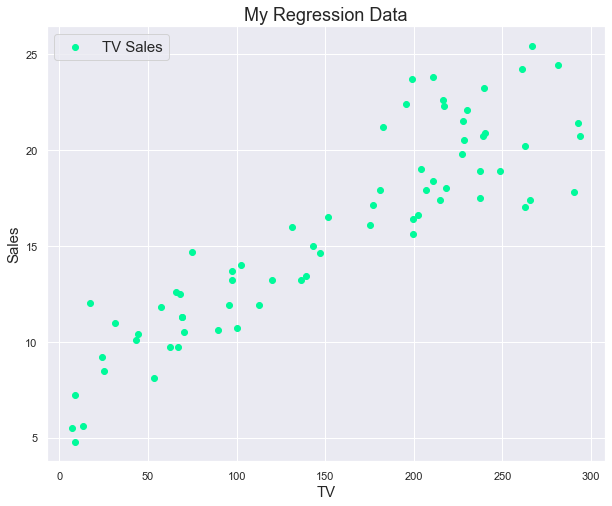

In [3]:
df = df.iloc[:70][["TV", "Sales"]]
plt.figure(figsize = (10,8))
plt.scatter(df.TV,
            df.Sales,
            color = "mediumspringgreen",
            label = "TV Sales")
plt.xlabel("TV", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

From sklearn.linear we import LinearRegression to make things a bit easier

In [4]:
model = linear_model.LinearRegression()
x = df.iloc[:, 0:3]
y = df[["Sales"]]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .2)
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
ypred_train
ypred_test



array([[23.2],
       [ 9.7],
       [11.3],
       [19. ],
       [13.2],
       [22.6],
       [18.9],
       [17.9],
       [20.2],
       [15.6],
       [12. ],
       [17.9],
       [ 8.5],
       [10.5]])

In [5]:
# Shows how accurate our model is
ypred_train - ytrain
np.sum(ypred_train - ytrain)
np.sum(ypred_test - ytest)
# this shows that our model is over fitting the data.

Sales   -1.598721e-14
dtype: float64

Explain MSE


In [12]:
# printing our coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, ypred_test))
print("Mean squared error: %.2f" % mean_squared_error(ytrain, ypred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, ypred_test))
print("Coefficient of determination: %.2f" % r2_score(ytrain, ypred_train))

reg_line = model.predict(np.reshape(np.linspace(0,300, num = 400),(400, 1)))
#b = np.linspace(0,300, num = 400).shape
print(reg_line)
# Plot outputs
#plt.plot(np.linspace(0,300, num = 400), reg_line, color="black")
plt.plot(xtest, ytest, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


Coefficients: 
 [[2.187845e-17 1.000000e+00]]
Mean squared error: 0.00
Mean squared error: 0.00
Coefficient of determination: 1.00
Coefficient of determination: 1.00


/Users/chan/Desktop/Data Science 4/Github Repository/.venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.